In [ ]:
# Average Monthly Temperatures at Nottingham, 1920-1939
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inlinecm

In [39]:
df2=pd.read_csv('D:/Nottingham.csv')

In [40]:
df2.head()


,Unnamed: 0,time,value
0,1,1920-01,40.6
1,2,1920-02,40.8
2,3,1920-03,44.4
3,4,1920-04,46.7
4,5,1920-05,54.1


In [41]:
df2.tail()

,Unnamed: 0,time,value
235,236,1939-08,61.8
236,237,1939-09,58.2
237,238,1939-10,46.7
238,239,1939-11,46.6
239,240,1939-12,37.8


In [42]:
df2.columns=["sr.no","Month","Temp"]
df2.head()

,sr.no,Month,Temp
0,1,1920-01,40.6
1,2,1920-02,40.8
2,3,1920-03,44.4
3,4,1920-04,46.7
4,5,1920-05,54.1


In [43]:
 df2 = df2.drop(columns = ['sr.no'])

In [44]:
df2.head()

,Month,Temp
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [45]:
df2['Month']=pd.to_datetime(df2['Month'])

In [46]:
df2.set_index('Month',inplace=True)

In [47]:
df2.head()

,Temp
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1


In [48]:
df2.describe()

,Temp
count,240.000000
mean,49.039583
std,8.572324
min,31.300000
25%,41.550000
50%,47.350000
75%,57.000000
max,66.500000


In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [121]:
#applying time series decomposition
#seasonal variations are constant over time hence using additive model.
result=seasonal_decompose(df2['Temp'], model='additive', period=12)

<AxesSubplot: xlabel='Month'>

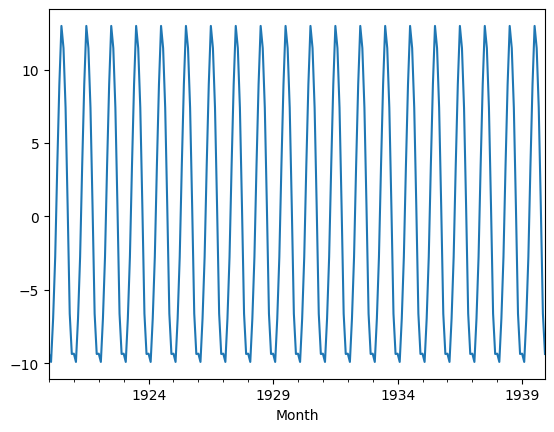

In [122]:
result.seasonal.plot()

<AxesSubplot: xlabel='Month'>

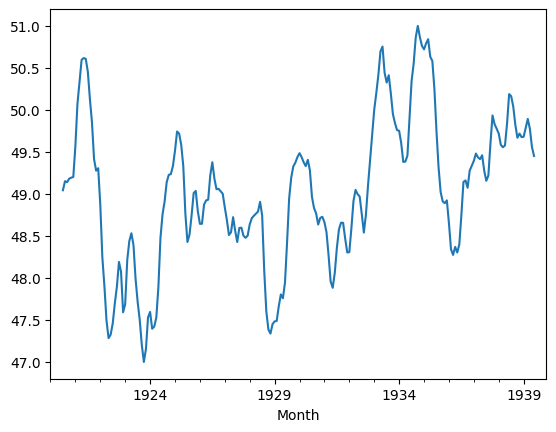

In [123]:
result.trend.plot()

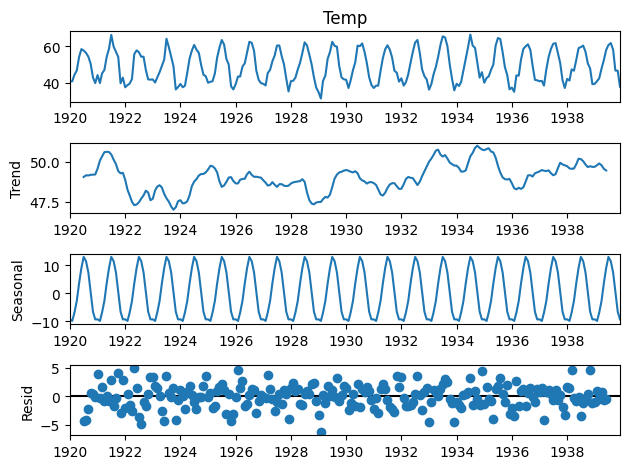

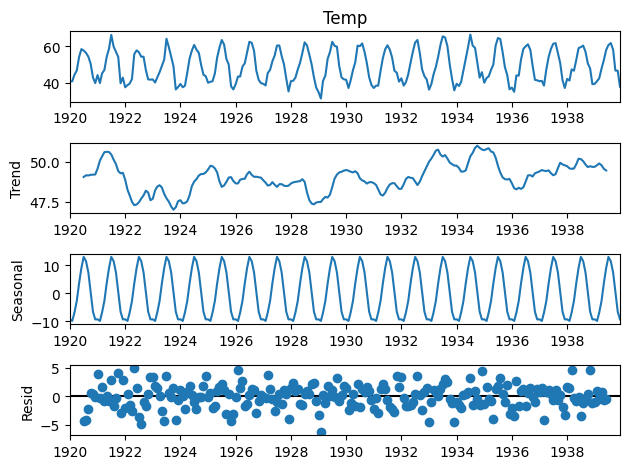

In [125]:
result.plot()

<AxesSubplot: xlabel='Month'>

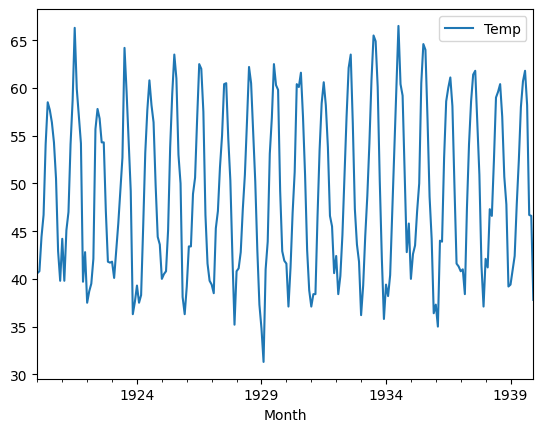

In [49]:
df2.plot()

In [50]:
## Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [51]:
test_result=adfuller(df2['Temp'])

In [52]:
def adfuller_test(Temp):
    result=adfuller(Temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

In [53]:
adfuller_test(df2['Temp'])

ADF Test Statistic : -3.2409168781062516
p-value : 0.017735098725082544
#Lags Used : 14
Number of Observations Used : 225


In [56]:
df2['Temp First Difference'] = df2['Temp'] - df2['Temp'].shift(1)


In [57]:
df2['Temp'].shift(1)

Month
1920-01-01     NaN
1920-02-01    40.6
1920-03-01    40.8
1920-04-01    44.4
1920-05-01    46.7
              ... 
1939-08-01    60.7
1939-09-01    61.8
1939-10-01    58.2
1939-11-01    46.7
1939-12-01    46.6
Name: Temp, Length: 240, dtype: float64

In [58]:
df2['Seasonal First Difference']=df2['Temp']-df2['Temp'].shift(12)

In [59]:
df2.head(14)

,Temp,Temp First Difference,Seasonal First Difference
Month,,,
1920-01-01,40.6,NaN,NaN
1920-02-01,40.8,0.2,NaN
1920-03-01,44.4,3.6,NaN
1920-04-01,46.7,2.3,NaN
1920-05-01,54.1,7.4,NaN
1920-06-01,58.5,4.4,NaN
1920-07-01,57.7,-0.8,NaN
1920-08-01,56.4,-1.3,NaN
1920-09-01,54.3,-2.1,NaN


In [60]:
## Again test dickey fuller test
adfuller_test(df2['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.068706491531395
p-value : 1.1648261562566306e-07
#Lags Used : 12
Number of Observations Used : 215


<AxesSubplot: xlabel='Month'>

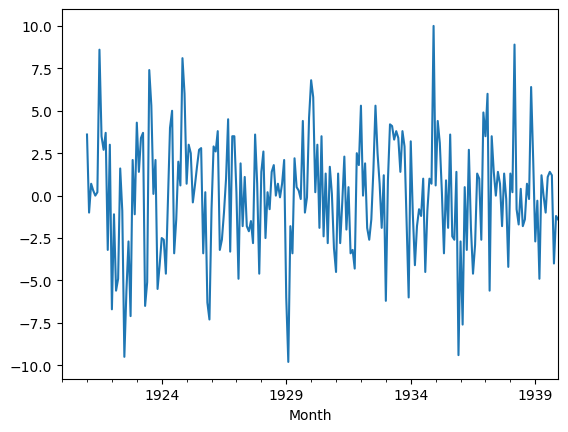

In [61]:
df2['Seasonal First Difference'].plot()

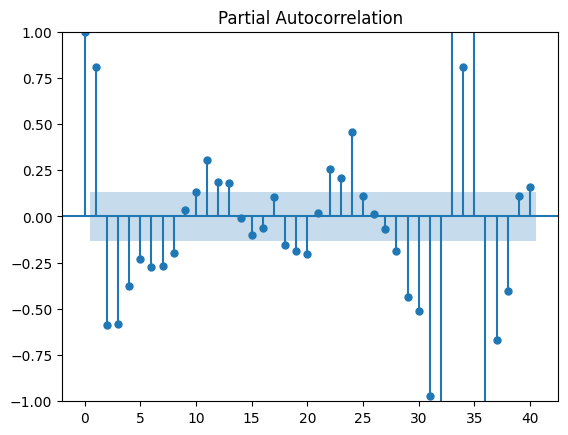

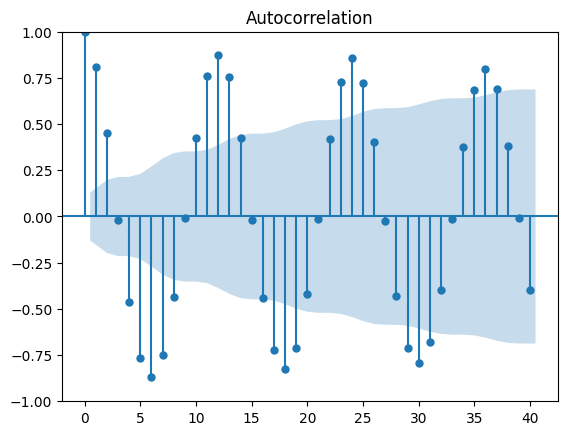

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf=plot_pacf(df2['Temp'].iloc[13:], lags=40)
acf=plot_acf(df2['Temp'].iloc[13:], lags=40)

In [64]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [86]:
# p=2, d=1, q=3
model=ARIMA(df2['Temp'],order=(2,1,3))
model_fit=model.fit()


In [72]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  240
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -571.945
Date:                Tue, 13 Dec 2022   AIC                           1155.890
Time:                        21:18:45   BIC                           1176.748
Sample:                    01-01-1920   HQIC                          1164.295
                         - 12-01-1939                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7322      0.001   1307.758      0.000       1.730       1.735
ar.L2         -1.0000   2.97e-05  -3.37e+04      0.000      -1.000      -1.000
ma.L1         -2.7289      3.897     -0.700      0.484     -10.368       4.910
ma.L2          2.7286      6.774      0.403      0.687     -10.549      16.006
ma.L3         -0.9997      3.911     -0.256      0.798      -8.664       6.665
sigma2         6.4573     25.400      0.254      0.799     -43.325      56.240
===================================================================================
Ljung-Box (L1) (Q):                  17.07   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               0.85   Skew:                            -0.14
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

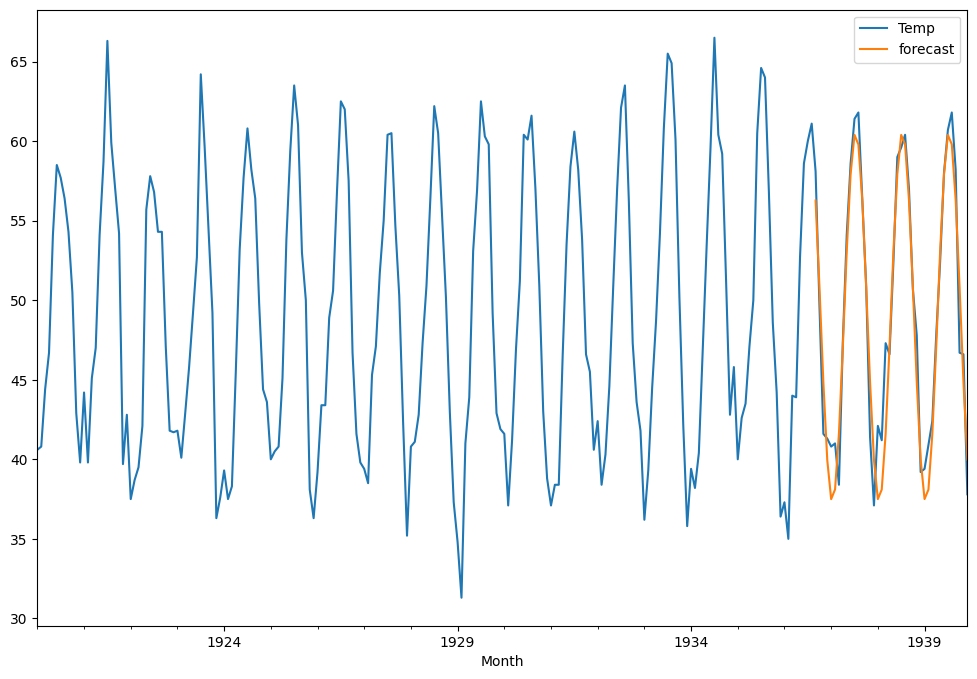

In [73]:
# Forecasted data
df2['forecast']=model_fit.predict(start=200,end=240,dynamic=True)
df2[['Temp','forecast']].plot(figsize=(12,8))


In [87]:
## Future Forecasting
from pandas.tseries.offsets import DateOffset
future_dates1=[df2.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [93]:
future_datest_df1=pd.DataFrame(index=future_dates1[1:],columns=df2.columns)

In [94]:
future_datest_df1.tail()

,Temp,Temp First Difference,Seasonal First Difference,forecast
1941-07-01,NaN,NaN,NaN,NaN
1941-08-01,NaN,NaN,NaN,NaN
1941-09-01,NaN,NaN,NaN,NaN
1941-10-01,NaN,NaN,NaN,NaN
1941-11-01,NaN,NaN,NaN,NaN


In [111]:
future_datest_df1.head()

,Temp,Temp First Difference,Seasonal First Difference,forecast
1940-01-01,NaN,NaN,NaN,NaN
1940-02-01,NaN,NaN,NaN,NaN
1940-03-01,NaN,NaN,NaN,NaN
1940-04-01,NaN,NaN,NaN,NaN
1940-05-01,NaN,NaN,NaN,NaN


In [95]:
future_df1=pd.concat([df2,future_datest_df1])


<AxesSubplot: >

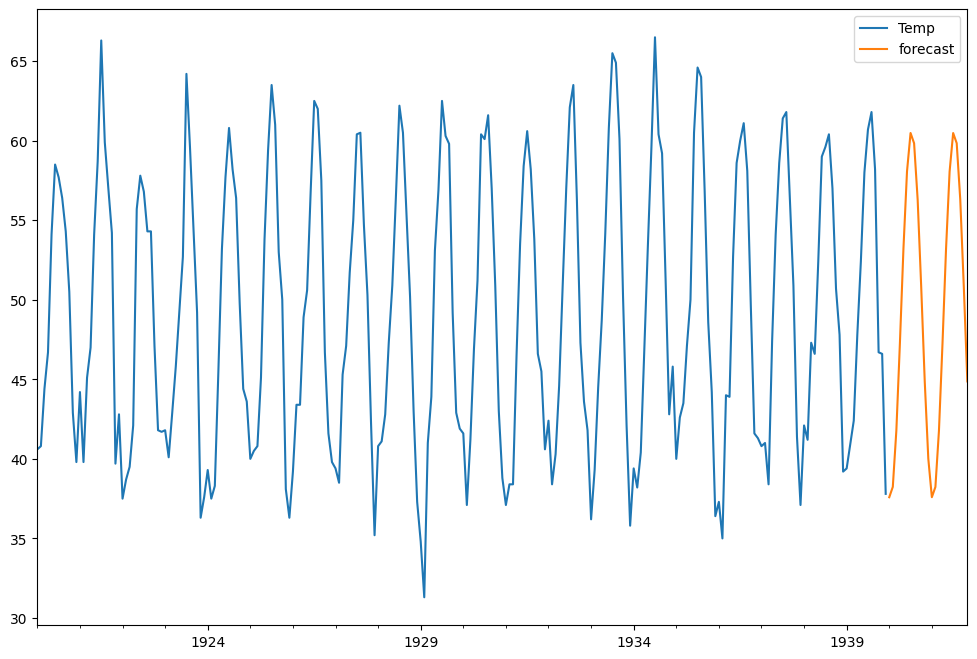

In [96]:
future_df1['forecast'] = model_fit.predict(start = 240, end = 264, dynamic= True)  
future_df1[['Temp', 'forecast']].plot(figsize=(12, 8)) 


In [97]:
future_df1.tail()

,Temp,Temp First Difference,Seasonal First Difference,forecast
1941-07-01,NaN,NaN,NaN,60.481320
1941-08-01,NaN,NaN,NaN,59.843092
1941-09-01,NaN,NaN,NaN,56.310609
1941-10-01,NaN,NaN,NaN,50.829988
1941-11-01,NaN,NaN,NaN,44.869116


In [112]:
test['Temp'].mean()

49.47500000000001

<AxesSubplot: xlabel='Month'>

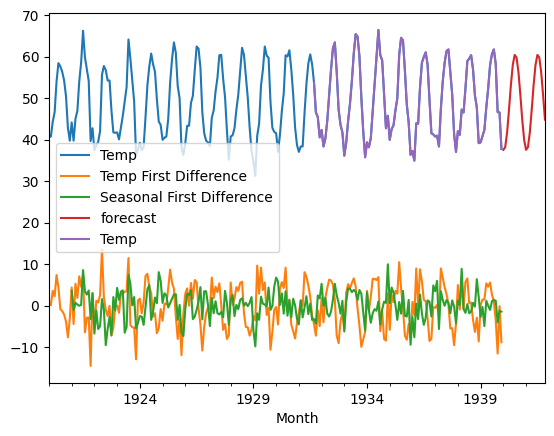

In [113]:
future_df1.plot(legend=True)
test['Temp'].plot(legend=True)

In [131]:
# RMSE - root mean square error
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt


arima_rmse = np.sqrt(mean_squared_error(test["Temp"].values, future_df1["forecast"]))
print("RMSE: ",arima_rmse)



In [74]:
#SARIMA model
import statsmodels.api as sm


In [76]:
model2=sm.tsa.statespace.SARIMAX(df2['Temp'],order=(2,1,3),seasonal_order=(2,1,3,12))
results=model2.fit()


<AxesSubplot: xlabel='Month'>

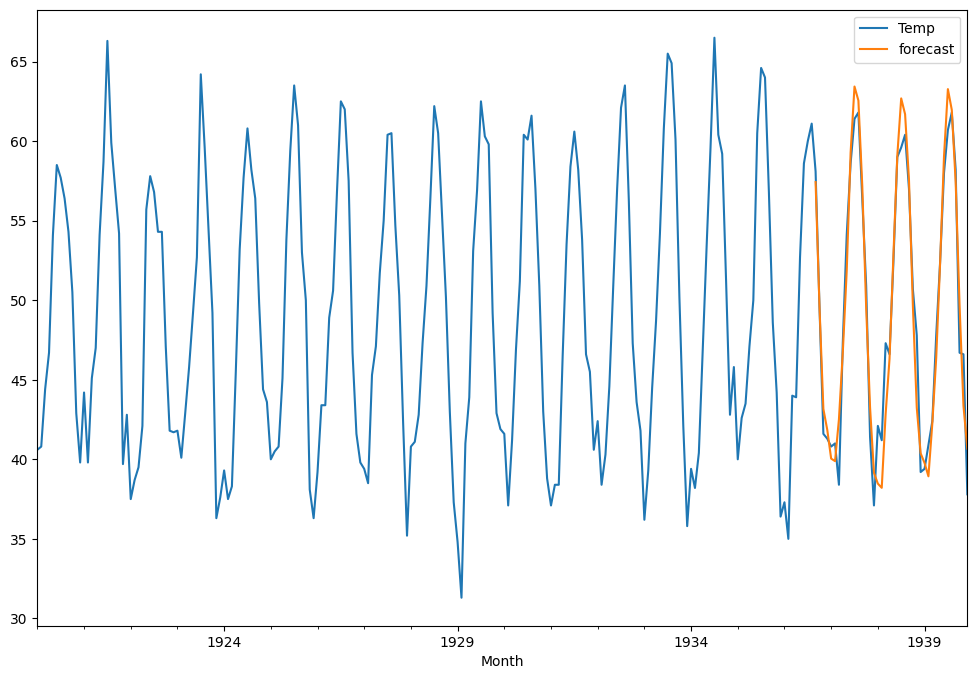

In [77]:
# Forecast model
df2['forecast']=results.predict(start=200,end=240,dynamic=True)
df2[['Temp','forecast']].plot(figsize=(12,8))


In [78]:
from pandas.tseries.offsets import DateOffset
future_dates=[df2.index[-1]+ DateOffset(months=x)for x in range(0,24)]


In [88]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df2.columns)

In [89]:
future_datest_df.tail()

,Temp,Temp First Difference,Seasonal First Difference,forecast
1941-07-01,NaN,NaN,NaN,NaN
1941-08-01,NaN,NaN,NaN,NaN
1941-09-01,NaN,NaN,NaN,NaN
1941-10-01,NaN,NaN,NaN,NaN
1941-11-01,NaN,NaN,NaN,NaN


In [90]:
#Future Prediction
future_df=pd.concat([df2,future_datest_df])


<AxesSubplot: >

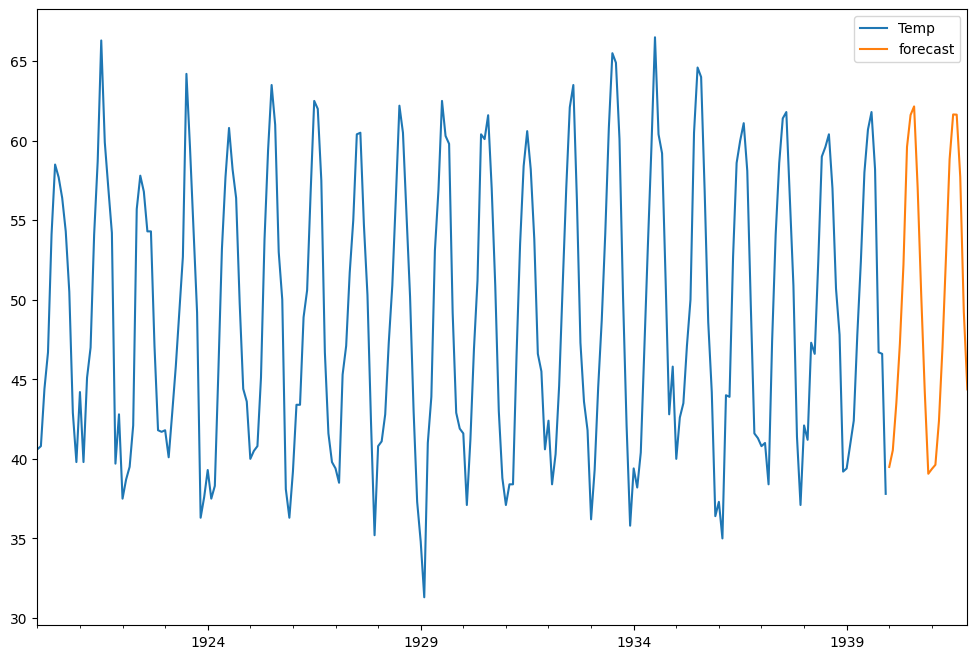

In [91]:
future_df['forecast'] = results.predict(start = 240, end = 264, dynamic= True)  
future_df[['Temp', 'forecast']].plot(figsize=(12, 8)) 



In [92]:
future_df.tail()

,Temp,Temp First Difference,Seasonal First Difference,forecast
1941-07-01,NaN,NaN,NaN,61.648099
1941-08-01,NaN,NaN,NaN,61.636848
1941-09-01,NaN,NaN,NaN,57.715971
1941-10-01,NaN,NaN,NaN,49.261278
1941-11-01,NaN,NaN,NaN,44.366811
